In [1]:
# Loading data

import pandas as pd
import numpy as np

df = pd.read_excel('default_of_credit_card_clients.xls')
 
df = df.iloc[: , 1:]
df = df.iloc[1: , :]

# print(df.columns)

# df.head()

In [2]:
# scaling

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(df.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'])



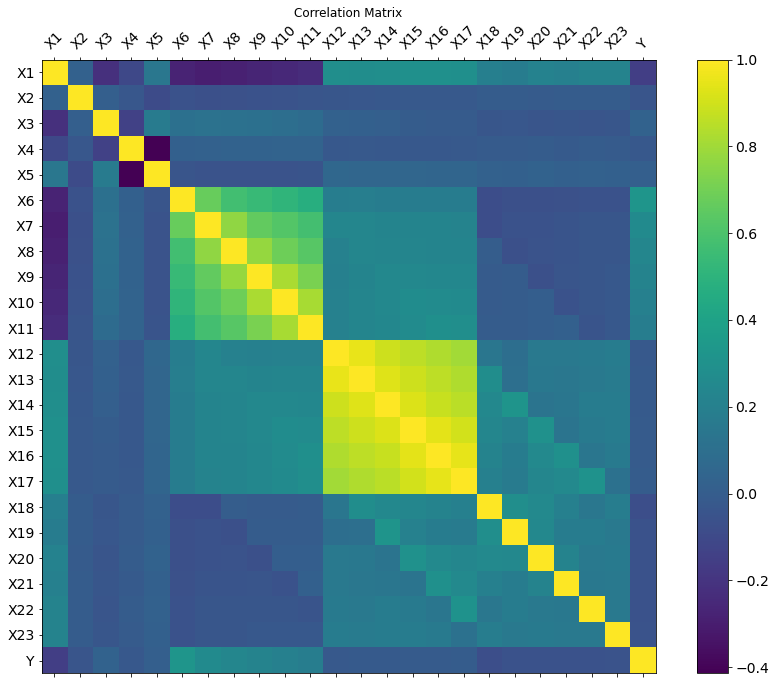

In [26]:
# Checking the interdependence of features.

import matplotlib.pyplot as plt

f = plt.figure(figsize=(15, 11))
plt.matshow(df_scaled.corr(), fignum=f.number)
plt.xticks(range(df_scaled.select_dtypes(['number']).shape[1]), df_scaled.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_scaled.select_dtypes(['number']).shape[1]), df_scaled.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=12);


In [4]:
# Function for accuracy

def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [75]:
# Logistic Regression

# Making 2 sets

from sklearn.model_selection import train_test_split

training_set, validation_set = train_test_split(df_scaled, test_size = 0.3, shuffle=True)

X_train = training_set.iloc[:,0:-1].values
Y_train = training_set.iloc[:,-1].values
X_test = validation_set.iloc[:,0:-1].values
Y_test = validation_set.iloc[:,-1].values


from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='sag',random_state=2,max_iter=1000)

lr.fit(X_train,Y_train)

Y_pred = lr.predict(X_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_pred, Y_test)

print(cm)
print("Accuracy of this model is : ", accuracy(cm))

from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred, zero_division=1))

[[6828 1567]
 [ 186  419]]
Accuracy of this model is :  0.8052222222222222
              precision    recall  f1-score   support

         0.0       0.81      0.97      0.89      7014
         1.0       0.69      0.21      0.32      1986

    accuracy                           0.81      9000
   macro avg       0.75      0.59      0.60      9000
weighted avg       0.79      0.81      0.76      9000



In [77]:
# SLP

# Making 2 sets

from sklearn.model_selection import train_test_split

training_set, validation_set = train_test_split(df_scaled, test_size = 0.3, shuffle=True)

X_train = training_set.iloc[:,0:-1].values
Y_train = training_set.iloc[:,-1].values
X_test = validation_set.iloc[:,0:-1].values
Y_test = validation_set.iloc[:,-1].values

from sklearn.linear_model import Perceptron

slp = Perceptron(alpha=0.05,tol=0.0001,n_iter_no_change=10,shuffle=True,random_state=2,max_iter=1000)

slp.fit(X_train,Y_train)

Y_pred = slp.predict(X_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_pred, Y_test)

print(cm)
print("Accuracy of this model is : ", accuracy(cm))

from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred, zero_division=1))

[[7034 1909]
 [  17   40]]
Accuracy of this model is :  0.786
              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88      7051
         1.0       0.70      0.02      0.04      1949

    accuracy                           0.79      9000
   macro avg       0.74      0.51      0.46      9000
weighted avg       0.77      0.79      0.70      9000



In [3]:
# Set Hyperparameters.

hidden_layer = (15)
initial_learning_rate = 0.05
validationset_ratio = 0.2
max_epoch = 1000
tolerance_value = 0.0001
tolerance_epochs = 20
act_func = 'logistic' # {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}
weight_update = 'sgd' # {‘lbfgs’, ‘sgd’, ‘adam’}
learn_rate_type = 'constant' # {‘constant’, ‘invscaling’, ‘adaptive’}
rand_state = 2
k_folds = 5

show_steps = False


# Initializing the model.

from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(hidden_layer_sizes=hidden_layer,
                        max_iter=max_epoch,
                        activation=act_func,
                        solver=weight_update,
                        learning_rate=learn_rate_type,
                        learning_rate_init=initial_learning_rate,
                        random_state=rand_state,
                        tol=tolerance_value,
                        n_iter_no_change=tolerance_epochs,
                        verbose=show_steps)

In [7]:
# Hyperparameter tuning with validation set.

# Making 2 sets

from sklearn.model_selection import train_test_split

training_set, validation_set = train_test_split(df_scaled, test_size = validationset_ratio, shuffle=True)

X_train = training_set.iloc[:,0:-1].values
Y_train = training_set.iloc[:,-1].values
X_val = validation_set.iloc[:,0:-1].values
Y_val = validation_set.iloc[:,-1].values

# Training the model

classifier.fit(X_train, Y_train)


# Testing the model

Y_pred = classifier.predict(X_val)


# Getting the accuracy

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm = confusion_matrix(Y_pred, Y_val)
print("Accuracy of this model is : ", accuracy(cm))

res = classification_report(Y_val, Y_pred, zero_division=1)

print(validationset_ratio, initial_learning_rate, hidden_layer)
print(res)

Accuracy of this model is :  0.8188333333333333
0.2 0.05 15
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89      4659
         1.0       0.67      0.38      0.48      1341

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.69      6000
weighted avg       0.80      0.82      0.80      6000



In [10]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Acc_Mat = [0.0 for x in range(k_folds)]

kf = KFold(n_splits=k_folds)
i = 0

for train_index, test_index in kf.split(df_scaled):
    X_train = df_scaled.iloc[train_index, 0:-1].values
    Y_train = df_scaled.iloc[train_index, -1].values
    X_test = df_scaled.iloc[test_index, 0:-1].values
    Y_test = df_scaled.iloc[test_index, -1].values


    classifier.fit(X_train, Y_train)

    Y_pred = classifier.predict(X_test)

    cm = confusion_matrix(Y_pred, Y_test)
    
    Acc_Mat[i] = accuracy(cm)

    
    print('Fold :', i+1)
    print("Confusion Matrix : ")
    print(cm)
    print("Performance score : ")
    print(classification_report(Y_test, Y_pred, zero_division=1))

    i = i + 1


Fold : 1
Confusion Matrix : 
[[4420  895]
 [ 267  418]]
Performance score : 
              precision    recall  f1-score   support

         0.0       0.83      0.94      0.88      4687
         1.0       0.61      0.32      0.42      1313

    accuracy                           0.81      6000
   macro avg       0.72      0.63      0.65      6000
weighted avg       0.78      0.81      0.78      6000

Fold : 2
Confusion Matrix : 
[[4374  936]
 [ 246  444]]
Performance score : 
              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88      4620
         1.0       0.64      0.32      0.43      1380

    accuracy                           0.80      6000
   macro avg       0.73      0.63      0.65      6000
weighted avg       0.78      0.80      0.78      6000

Fold : 3
Confusion Matrix : 
[[4307  867]
 [ 236  590]]
Performance score : 
              precision    recall  f1-score   support

         0.0       0.83      0.95      0.89      4543
      

In [9]:
# for i in range(k_folds):
#     print('Accuracy for fold ', i, ' is ', Acc_Mat[i])


print('Average accuracy is : ', sum(Acc_Mat) / len(Acc_Mat))

Average accuracy is :  0.8184333333333333
